# CS2410 -- Semester Project
## Team Name : NULL

### Dataset : IMDb movies
### Model Plan : Complete a simple EDA on IMDb movies dataset and determine what factors are the biggest indicators of a high grossing film

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

movie_data = pd.read_csv('movies.csv')

movie_data.head()

,Title,Rating,Genre,Year,ReleaseDate,Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime
0,Superbabies: Baby Geniuses 2,PG,Comedy,2004,27-Aug-04,1.9,30000.0,Bob Clark,Robert Grasmere,Jon Voight,Germany,20000000.0,9448644.0,ApolloMedia Distribution,88.0
1,The Hottie & the Nottie,PG-13,Comedy,2008,21-Feb-08,1.9,36000.0,Tom Putnam,Heidi Ferrer,Paris Hilton,United States,NaN,1596232.0,Purple Pictures,91.0
2,Disaster Movie,PG-13,Comedy,2008,29-Aug-08,1.9,88000.0,Jason Friedberg,Jason Friedberg,Carmen Electra,United States,20000000.0,34816824.0,Lionsgate,87.0
3,From Justin to Kelly,PG,Comedy,2003,20-Jun-03,2.1,25000.0,Robert Iscove,Kim Fuller,Kelly Clarkson,United States,12000000.0,4928883.0,19 Entertainment,81.0
4,House of the Dead,R,Action,2003,10-Oct-03,2.1,36000.0,Uwe Boll,Mark A. Altman,Jonathan Cherry,Germany,12000000.0,13818181.0,Boll Kino Beteiligungs GmbH & Co. KG,90.0


In [2]:
movie_data.describe()

,Year,Score,Votes,Budget,Gross,Runtime
count,7614.000000,7611.000000,7.611000e+03,5.483000e+03,7.433000e+03,7610.000000
mean,2000.488574,6.389778,8.869066e+04,3.566672e+07,7.897962e+07,107.291459
std,11.139895,0.968595,1.637526e+05,4.148125e+07,1.661249e+08,18.616816
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.300000e+03,1.000000e+07,4.634077e+06,95.000000
50%,2001.000000,6.500000,3.300000e+04,2.100000e+07,2.038760e+07,104.000000
75%,2010.000000,7.100000,9.400000e+04,4.500000e+07,7.641976e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [3]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7614 entries, 0 to 7613
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        7614 non-null   object 
 1   Rating       7538 non-null   object 
 2   Genre        7614 non-null   object 
 3   Year         7614 non-null   int64  
 4   ReleaseDate  7614 non-null   object 
 5   Score        7611 non-null   float64
 6   Votes        7611 non-null   float64
 7   Director     7614 non-null   object 
 8   Writer       7612 non-null   object 
 9   Star         7613 non-null   object 
 10  Country      7611 non-null   object 
 11  Budget       5483 non-null   float64
 12  Gross        7433 non-null   float64
 13  Company      7597 non-null   object 
 14  Runtime      7610 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 892.4+ KB


### Data Cleaning

In [4]:
#Drop irrelevant data
movie_data.drop(['ReleaseDate', 'Writer', 'Star', 'Country', 'Company', 'Runtime'], axis=1, inplace=True)

movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7614 entries, 0 to 7613
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     7614 non-null   object 
 1   Rating    7538 non-null   object 
 2   Genre     7614 non-null   object 
 3   Year      7614 non-null   int64  
 4   Score     7611 non-null   float64
 5   Votes     7611 non-null   float64
 6   Director  7614 non-null   object 
 7   Budget    5483 non-null   float64
 8   Gross     7433 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 535.5+ KB


In [5]:
#Check for Duplicates
movie_data.duplicated().sum()

0

In [6]:
#Check for Null values
movie_data.isnull().sum()

Title          0
Rating        76
Genre          0
Year           0
Score          3
Votes          3
Director       0
Budget      2131
Gross        181
dtype: int64

In [7]:
#Fill Null ratings with 'U' for Unrated
movie_data['Rating'].fillna('U', inplace=True)

In [8]:
#Drop datasets with Null values
movie_data.dropna(axis=0, inplace=True)

In [9]:
movie_data.isnull().sum()

Title       0
Rating      0
Genre       0
Year        0
Score       0
Votes       0
Director    0
Budget      0
Gross       0
dtype: int64

In [10]:
movie_data.head(10)

,Title,Rating,Genre,Year,Score,Votes,Director,Budget,Gross
0,Superbabies: Baby Geniuses 2,PG,Comedy,2004,1.9,30000.0,Bob Clark,20000000.0,9448644.0
2,Disaster Movie,PG-13,Comedy,2008,1.9,88000.0,Jason Friedberg,20000000.0,34816824.0
3,From Justin to Kelly,PG,Comedy,2003,2.1,25000.0,Robert Iscove,12000000.0,4928883.0
4,House of the Dead,R,Action,2003,2.1,36000.0,Uwe Boll,12000000.0,13818181.0
5,Leonard Part 6,PG,Action,1987,2.2,7900.0,Paul Weiland,24000000.0,4615255.0
6,Son of the Mask,PG,Comedy,2005,2.2,53000.0,Lawrence Guterman,84000000.0,59981548.0
7,Who's Your Caddy?,PG-13,Comedy,2007,2.2,15000.0,Don Michael Paul,7000000.0,5713425.0
9,Glitter,PG-13,Drama,2001,2.3,22000.0,Vondie Curtis-Hall,22000000.0,5271666.0
10,Alone in the Dark,R,Action,2005,2.4,42000.0,Uwe Boll,20000000.0,12693645.0
11,Epic Movie,PG-13,Adventure,2007,2.4,103000.0,Jason Friedberg,20000000.0,87238158.0


### Average Gross and High Rating(Score) Analysis

In [11]:
high_rate = movie_data[movie_data['Score'] >= 7]

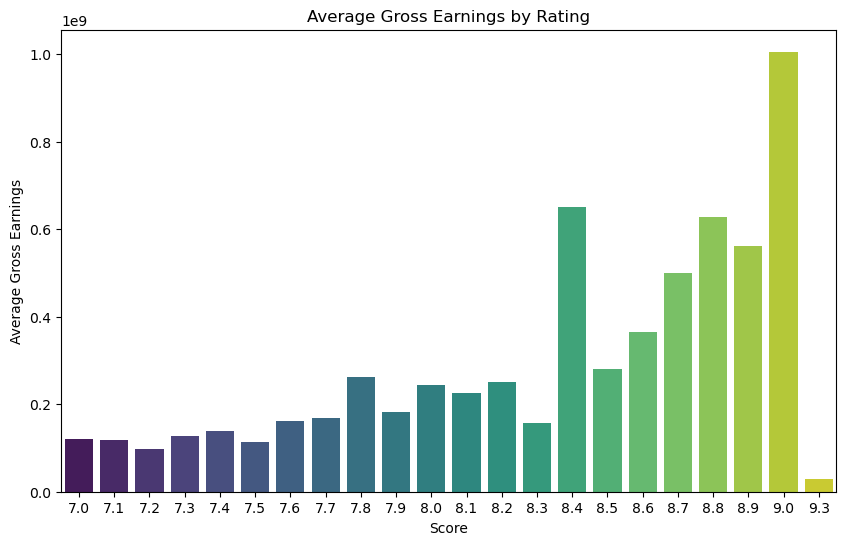

In [12]:
score_gross = high_rate.groupby('Score')['Gross'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Gross', data=score_gross, palette='viridis')
plt.title('Average Gross Earnings by Rating')
plt.xlabel('Score')
plt.ylabel('Average Gross Earnings')
plt.show()


#### To ensure that there is a correlation between rating and gross, we will do create a graph for mid ratings v average gross.

In [28]:
mid_rate = movie_data[(movie_data['Score'] >= 4) & (movie_data['Score'] < 7)]

In [29]:
mid_score_gross = mid_rate.groupby('Score')['Gross'].mean().sort_values(ascending=False).reset_index()

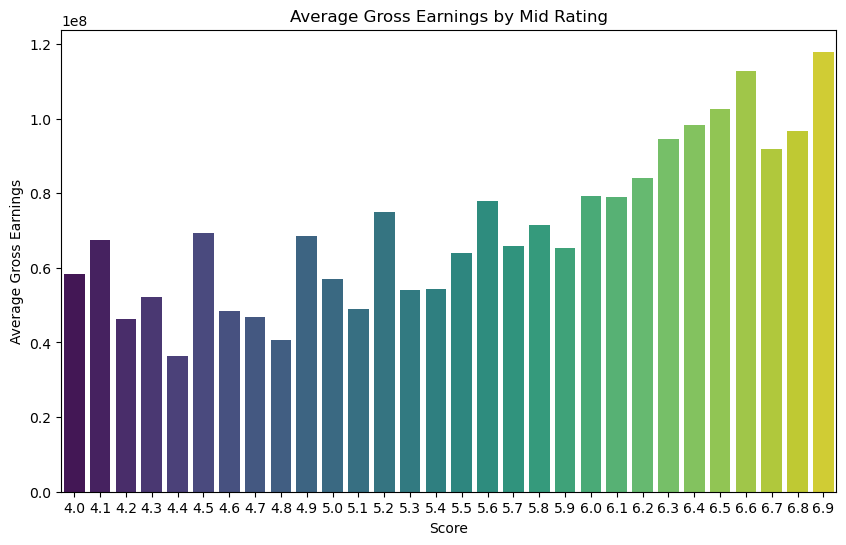

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Gross', data=mid_score_gross, palette='viridis')
plt.title('Average Gross Earnings by Mid Rating')
plt.xlabel('Score')
plt.ylabel('Average Gross Earnings')
plt.show()

### Average Gross and Budget Analysis

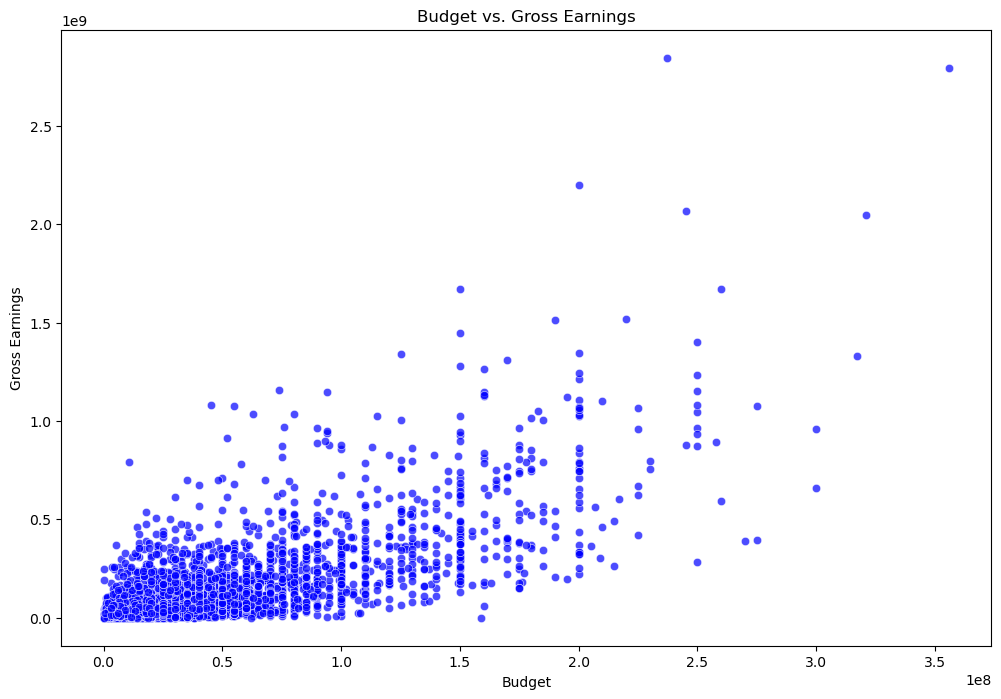

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Budget', y='Gross', data=movie_data, alpha=0.7, color='blue')

plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

### Average Gross and Genre Analysis

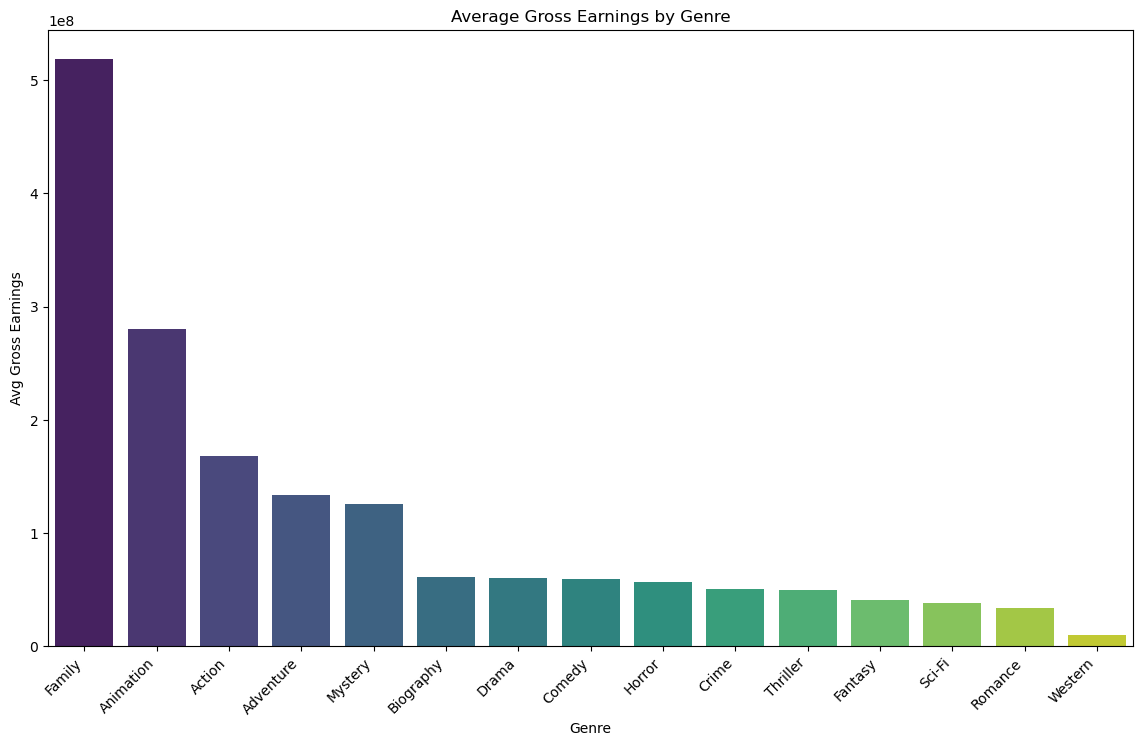

In [14]:
genre_gross = movie_data.groupby('Genre')['Gross'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14,8))
sns.barplot(x='Genre', y='Gross', data=genre_gross, palette='viridis')
plt.title('Average Gross Earnings by Genre')
plt.xlabel('Genre')
plt.ylabel('Avg Gross Earnings')
plt.xticks(rotation=45, ha='right')
plt.show()

### Heatmap Graph

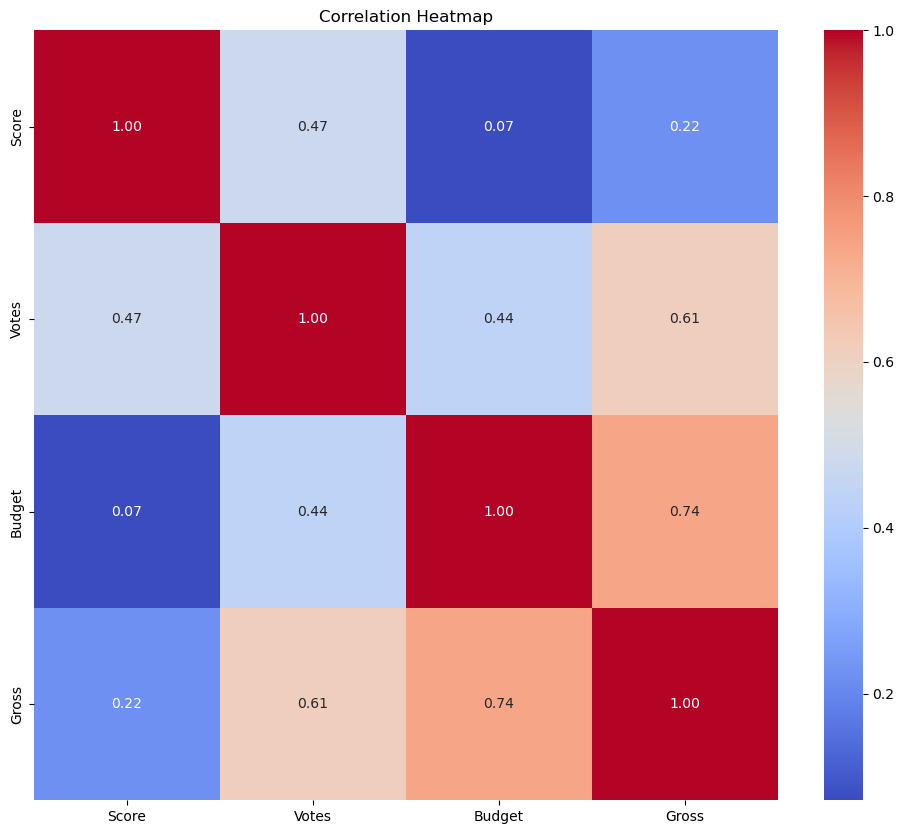

In [24]:
#Create Heatmap to look for correlation between the datasets
#Heatmap only work with numeric values so we created a new dataframe for this graph

num_movie_data = movie_data[['Score', 'Votes', 'Budget', 'Gross']]

plt.figure(figsize = (12,10))
corr_matrix = num_movie_data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

As seen from the heatmap, there is a relatively high correlation between the movie Budget and Gross and Votes and Gross. To further our analysis we decided to create a linear regression models for them.

### Linear Regression Model : Budget v Gross

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
#Prepare Data
X = movie_data['Budget'].values.reshape(-1,1)
y = movie_data['Gross'].values

In [17]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Create and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

#Make prediction
y_pred = model.predict(X_test)

In [19]:
#Evaluate performance
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.6194885529624912e+16
Root Mean Squared Error: 127259127.49042763
R-squared: 0.5603437653743593


The MSE and RMSE is relatively high, therefore it can be said that the our model is not performing quite well. There will be a large amount of prediction errors. The model's R-squared value is neither good nor bad; however, since anything above 0.5 can be considered good, we can say that our model fits well.

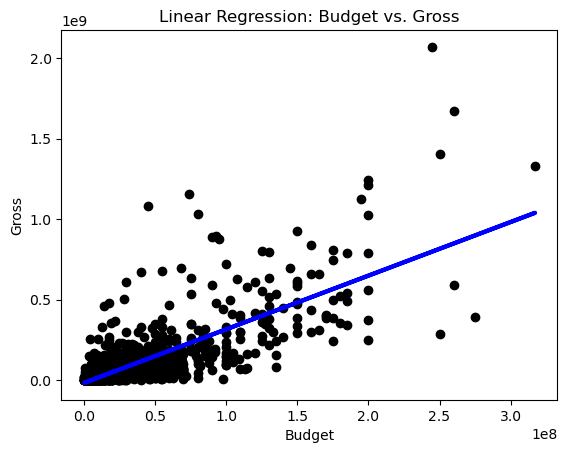

In [20]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Linear Regression: Budget vs. Gross')
plt.show()

### Linear Regression : Votes v Gross

In [32]:
X = movie_data['Votes'].values.reshape(-1,1)
y = movie_data['Gross'].values

In [33]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

#Make prediction
y_pred = model.predict(X_test)

#Evaluate performance
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.3149675733993824e+16
Root Mean Squared Error: 152150174.93908387
R-squared: 0.3715362021303512


The MSE and RMSE is really high compared the previous linear model, therefore it can be said that the our model will not perform well. The model's R-squared value is bad; therefore, it can be said that our model will fit badly.

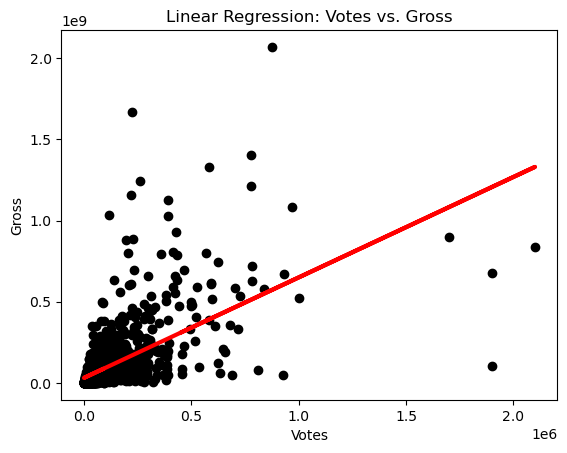

In [34]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Votes')
plt.ylabel('Gross')
plt.title('Linear Regression: Votes vs. Gross')
plt.show()

### To conclude, our analysis reveals that Budget can be a factor in predicting a film's potential for high gross income. However, contrary to heatmap graph, it's clear that Votes may not be a valid sign.